# Ford Go-Bike Trip Data Exploration

## Investigation Overview

In this investigation, I'm interested in figuring ride usage trends according to monthly and weekly distributions.

## Dataset Overview

There are 516988 ride entries in the dataset with 13 different variables as seen above. Most variables are float type and some need to be converted from object to datetime, rest the data was almost clean.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
import math

%matplotlib inline

In [2]:
rides = pd.read_csv('2017-fordgobike-tripdata.csv')

In [3]:
rides['start_time']=pd.to_datetime(rides['start_time'])
rides['end_time']=pd.to_datetime(rides['end_time'])
rides['start_date']=rides['start_time'].dt.date
rides['end_date']=rides['end_time'].dt.date
rides['start_month']=rides['start_time'].dt.month.astype(int)
rides['end_month']=rides['end_time'].dt.month.astype(int)
rides['start_day']=rides['start_time'].dt.day.astype(int)
rides['end_day']=rides['end_time'].dt.day.astype(int)
rides['start_day_name']=rides['start_time'].dt.day_name()
rides['end_day_name']=rides['end_time'].dt.day_name()
rides['start_year']=rides['start_time'].dt.year.astype(int)
rides['end_year']=rides['end_time'].dt.year.astype(int)
rides['month']=rides['start_time'].dt.month_name()
rides['week']=rides['start_date'].apply(lambda d: (d.day-1) // 7 + 1)
rides['dow'] = rides['start_time'].dt.dayofweek.astype(int)
rides['duration_min'] = (rides['duration_sec']/60).astype(float)

In [4]:
rides.drop(rides[rides['end_year'] == 2018].index , inplace=True)
rides.drop(rides[rides['start_month'] == 6].index , inplace=True)
rides.drop(['start_year','end_year'], axis=1, inplace=True)

## Q1) Whether ride count in the given dataset is in increasing or decreasing order?

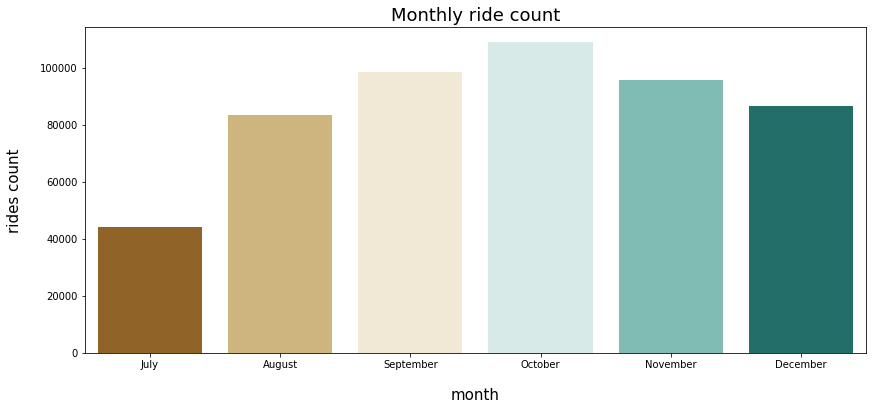

In [5]:
plt.figure(figsize=(14,6))
sb.countplot(x='month', palette="BrBG", data=rides.sort_values(by='start_month'))
plt.title('Monthly ride count', fontsize=18)
plt.xlabel('month', labelpad=18, fontsize=15)
plt.ylabel('rides count', labelpad=18, fontsize=15)
ax = plt.gca()
plt.savefig('Q1.png')

**As observed above, there was a huge bump in rides since August and a slow decrease is to be seen since November.<br> Hence, the reason for this may be the season but the exact cause couldnt be assessed just by 6 months data.<br> Therefore, to conclude upon the given data, Yes, rides count has increased since July.**

## Q2) Does daily traffic differ from weekday to weekend?

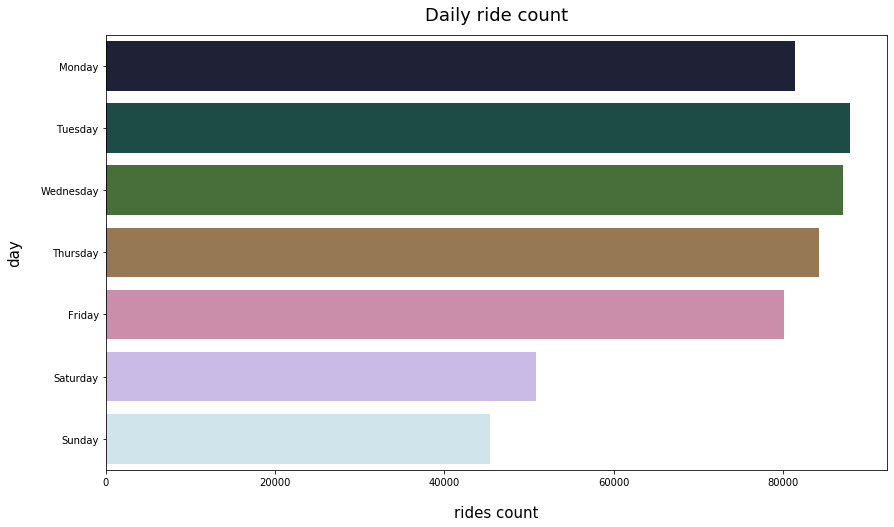

In [6]:
plt.figure(figsize=(14,8))
sb.countplot(y='start_day_name', palette='cubehelix', data=rides.sort_values(by='dow'), orient='h')
plt.title('Daily ride count', fontsize=18, y=1.02)
plt.xlabel('rides count', labelpad=18, fontsize=15)
plt.ylabel('day', labelpad=18, fontsize=15)
ax = plt.gca()
plt.savefig('Q2.png')

**As observed above, we can conclude that weekdays have much higher traffic than weekends mostly because of workdays.**

## Q3) Does ride count of subscribers and customers differ?

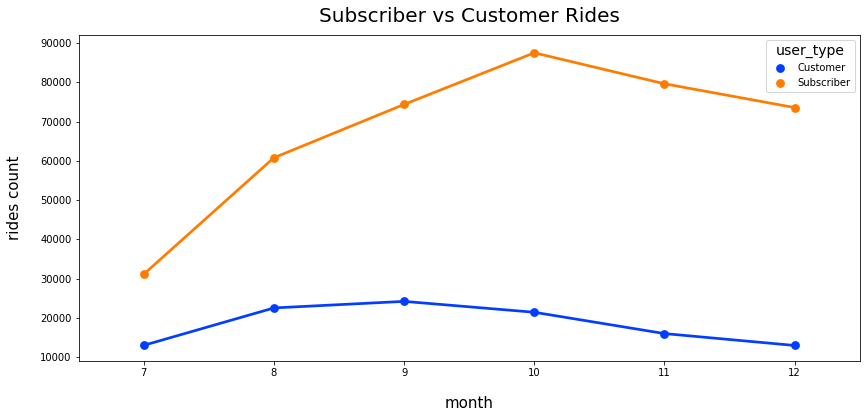

In [7]:
plt.figure(figsize=(14,6))
ax = sb.pointplot(x='start_month', y=0, hue='user_type', palette='bright', data=rides.groupby(["start_month", "user_type"]).size().reset_index())
plt.title('Subscriber vs Customer Rides', fontsize=20, y=1.02)
plt.xlabel('month', labelpad=18, fontsize=15)
plt.ylabel('rides count', labelpad=18, fontsize=15)
leg = ax.legend()
leg.set_title('user_type',prop={'size':14})
ax = plt.gca()
plt.savefig('Q3.png')

**As observed above, customer's ride count is much lower than subscriber's rides count, this maybe because of subscribers are much more in number than customers.<br> Also, customer ride count is somewhat linear throughout the data whereas, subscribers ride count is in an increasing order overall.<br> Therefore, to conclude, subscriber and customer ride count differs alot.**

## Q4) Does the duration of rides differ from customer to subscriber?

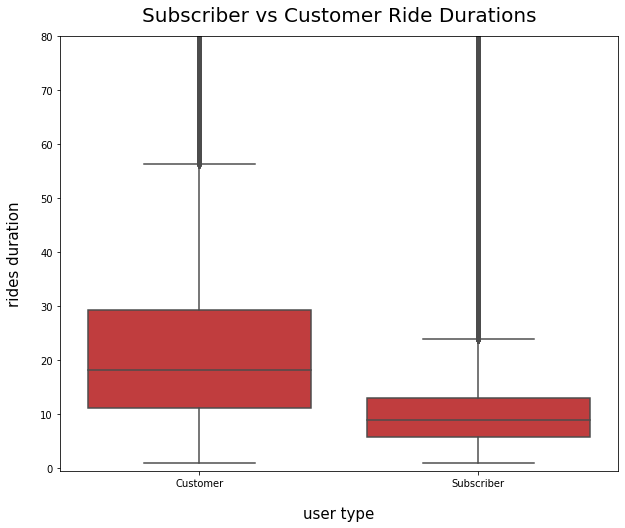

In [8]:
plt.figure(figsize=[10, 8])
mycolor = sb.color_palette()[3]
sb.boxplot(data=rides, x='user_type', y='duration_min', color=mycolor)
plt.ylim([-0.5, 80])
plt.title('Subscriber vs Customer Ride Durations', fontsize=20, y=1.02)
plt.xlabel('user type', labelpad=18, fontsize=15)
plt.ylabel('rides duration', labelpad=18, fontsize=15)
plt.savefig('Q4.png')
plt.show()

**As observed above, even if subscribers rides count is much higher than customer's yet, customers average trip duration is much higher than that of subscribers.<br> To conclude, ride duration of customer is higher than subscriber however, if customer counts was to balanced out with subscriber, the difference in average duration of both types might've reduced.**

## Lastly, i want to explore what difference does user type make on both ride duration and daily traffic.

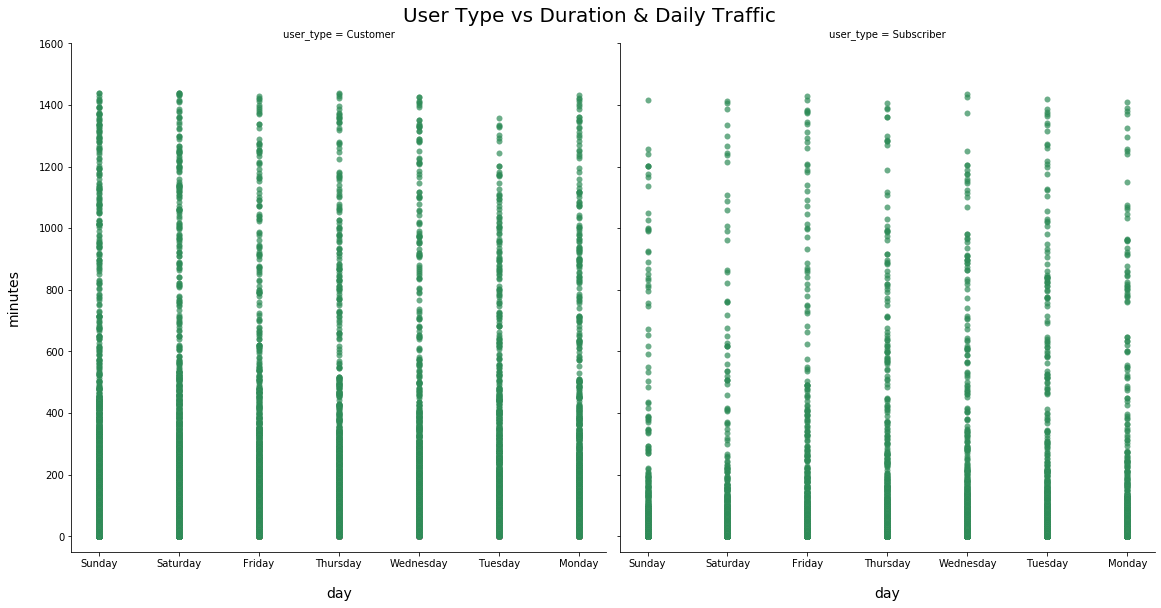

In [9]:
user_type = sb.FacetGrid(data = rides, col = 'user_type', col_wrap = 2, height = 8, ylim = [-50, 1600])
user_type.map(sb.scatterplot, 'start_day_name', 'duration_min', alpha= 0.7, linewidth=0.02, color='seagreen')
user_type.set_xlabels('day', labelpad=18, fontsize=14)
user_type.set_ylabels('minutes', labelpad=18, fontsize=14)
user_type.fig.suptitle('User Type vs Duration & Daily Traffic', y=1.02, fontsize=20)
plt.savefig('Q5.png')
plt.show()

**As observed above, duration for customers is generally higher than subscribers but we now can also point out that customers ride duration is slightly higher on weekends than weekdays while for subscribers it's quite the opposite.<br> Therefore to conclude, we can find more customers on weekends than usual while subscribers are almost the same throughout the week and slightly more on weekdays.**

# Thank You.